<a href="https://colab.research.google.com/github/RieGan/machine_learning/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
### Ganjar Muhammad Parikesit
### 17/409434/PA/17741

## Import lib

In [1]:
import sys
import pandas
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from numpy import matmul as mul
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Parameters

In [2]:
LEARNING_RATE = 0.001
ITERATION = 100
TOLERANCE = 0.00000001
LAMBDA = 0.1

STARTER_THETA = [
    [3.01281475e-06,-6.15894990e+00,1.07255401e+01],
    [1.36318985e-05,6.55364827e-01,-1.55722013e+00],
    [-2.04360334e-05,1.12220909e+00,-2.46136642e+00]
]


## Dataset preprocessing

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
y = iris.target

In [4]:
def split_dataset(data, target, normalize=False, ratio=0.3):
    train = {
        'data': [],
        'target': []
    }
    test = {
        'data': [],
        'target': []
    }
    if(normalize):
        train['data'], test['data'], train['target'], test['target'] = train_test_split(data, target, test_size=ratio, random_state=41, stratify=target)
    else:
        train['data'], test['data'], train['target'], test['target'] = train_test_split(data, target, test_size=ratio, random_state=41)
    
    # add one for first theta
    ones = np.ones((len(train['data']), 1))
    train['data'] = np.hstack((ones, train['data']))
    ones = np.ones((len(test['data']), 1))
    test['data'] = np.hstack((ones, test['data']))


    return train, test

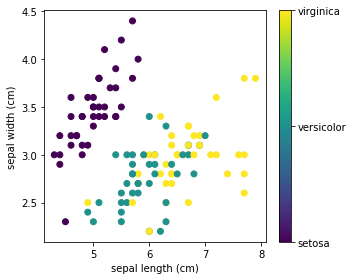

In [5]:
# split dataset
train_dataset, test_dataset = split_dataset(X, y, normalize=True, ratio=0.2)

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(train_dataset['data'][:, 1], train_dataset['data'][:, 2], c=train_dataset['target'])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.tight_layout()
plt.show()

## Logistic Regression Function

In [6]:
def sigmoid(z):
    # convert input to a numpy array
    z = np.array(z)
    
    # prepare variable g to store the value of sigmoid function of z
    g = np.zeros(z.shape)
    
    # sigmoid function
    g = 1 / (1 + np.exp(-z))
    return g

def hypothesis(X, theta):
    return sigmoid(mul(X, theta))

# using matmul for summing; POC:https://gregorygundersen.com/blog/2020/07/17/matmul/
def cost_function(theta, X, y, lamda=None):
    m = X.shape[0]
    if(lamda):
        return (
            (-1/m) * (mul(y.T, np.log(hypothesis(X, theta))) + mul((1-y).T, np.log(1-hypothesis(X, theta)))) + lamda/(2*m) * mul(theta.T, theta)
        )
    else:
        return (-1/m) * (mul(y.T, np.log(hypothesis(X, theta))) + mul((1-y).T, np.log(1-hypothesis(X, theta))))

def grad_descent(theta, X, y, lamda=None):
    m = X.shape[0]
    theta[0] = 0
    if(lamda):
        return 1/m * mul(X.T, (hypothesis(X, theta) - y)) + (lamda/m) * theta
    else:
        return 1/m * mul(X.T, (hypothesis(X, theta) - y))

def update_theta(theta, X, y, lamda=None, alpha=1):
    return theta - alpha * grad_descent(theta, X, y, lamda)
    
def init_theta(X, theta=None):
    if(theta==None):
        return np.zeros((X.shape[1]))
    else:
        return np.array(theta, dtype=np.float64)
    

## Helper

In [7]:
def redefine_target(dataset, kelas):
    data = {
        'data': dataset['data'].copy(),
        'target': dataset['target'].copy()
    }
    data['target'][data['target'] != kelas] = 9999
    data['target'][data['target'] == kelas] = 1
    data['target'][data['target'] == 9999] = 0

    return data

def plot_cost(cost, cost_reg=None, title=None):
    plt.figure(figsize=(7, 5))
    plt.plot(cost, label="cost")
    if(cost_reg != None):
        plt.plot(cost_reg, label="cost regularized")
    plt.xlabel("iteration")
    plt.ylabel("cost")
    if(title != None):
        plt.title("Training: "+title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# legend patch
plot_patch = [
    mpatches.Patch(color='green', label='True Positive'),
    mpatches.Patch(color='blue', label='True Negative'),
    mpatches.Patch(color='yellow', label='False Positive'),
    mpatches.Patch(color='red', label='False Negative')
    ]
acc_patch = [mpatches.Rectangle((0, 0), 1, 1, fc="white", ec="white",lw=0, alpha=0)] * 2

def test_result(X, y, val, title=None):
    test_data = {
        'true': 0,
        'false': 0
    }

    plot = {
        'x':[],
        'y':[],
        'c':[],
    }

   # counting(mapping) TP, TN, FP, FN and add color
    for i in range(len(y)):
        if(int(y[i]>=0.5) == val[i]):
            test_data['true']+=1
            plot['x'].append(X[i][1])
            plot['y'].append(X[i][2])
            if(val[i]==0):
                plot['c'].append('blue')
            else:
                plot['c'].append('green')
        else:
            test_data['false']+=1
            plot['x'].append(X_test[i][1])
            plot['y'].append(X_test[i][2])
            if(val[i]==0):
                plot['c'].append('yellow')
            else:
                plot['c'].append('red')

    
    # label text true, false, acc count
    acc_label = [
        "T/F  :"+str(test_data['true'])+"/"+str(test_data['false']),
        "Acc. :"+str(round(test_data['true']/(test_data['true']+test_data['false']),2))
        ]

    # generate data for decision boundary    
    coor_x = np.linspace(4,7.5,100)
    coor_y = -theta[0]/theta[2] - theta[1] * coor_x/theta[2]

    plt.figure(figsize=(7,5))
    # draw decision boundary
    plt.plot(coor_x, coor_y, '-m')
    # draw test validation
    plt.scatter(plot['x'], plot['y'], c=plot['c'])
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    if(title != None):
        plt.title("test result: "+title)
    legend2 = plt.legend(handles=acc_patch,labels=acc_label,loc=2,fontsize='small',fancybox=True,framealpha=0.7,handlelength=0,handletextpad=0)
    plt.legend(handles=plot_patch,loc=4)
    plt.gca().add_artist(legend2)
    plt.show()


## Training Function

In [8]:
def train(dataset, iteration=None, theta=None, lamda=None):
    cost_history = []
    theta = init_theta(dataset['data'], theta)
    alpha = LEARNING_RATE
    n_iter = 0
    X = dataset['data']
    y = dataset['target']
    old_cost = 999999
    new_cost = cost_function(theta, X, y, lamda=lamda)
    if(iteration):
        for i in range(iteration):
            theta = update_theta(theta, X, y, lamda, alpha)
            cost_history.append(cost_function(theta, X, y))
            n_iter+=1
    
    # bruteforce until (cost difference<TOLERANCE)
    else:
        while(abs(old_cost-new_cost)>TOLERANCE):
            theta = update_theta(theta, X, y, lamda, alpha)
            old_cost = new_cost
            new_cost = cost_function(theta, X, y)
            cost_history.append(new_cost)
            n_iter+=1
        
    return theta, cost_history
        


## Run Logistic Regression 

Class: setosa


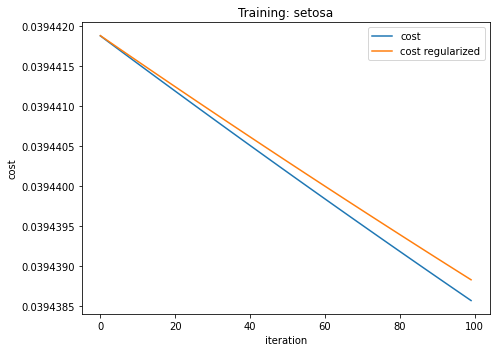

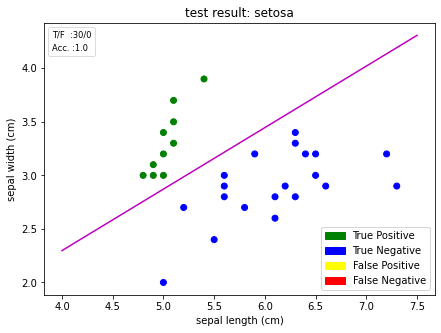

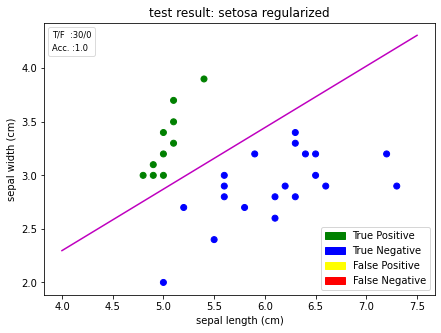

Class: versicolor


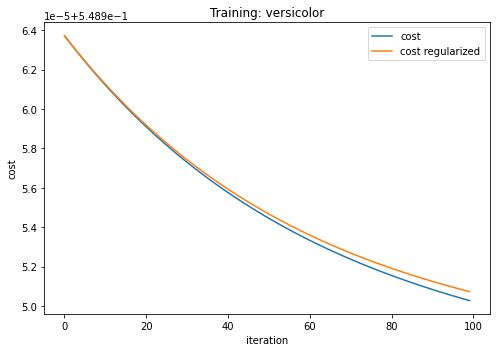

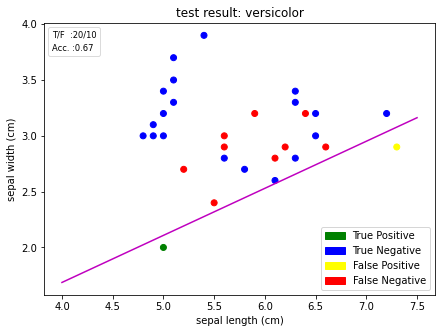

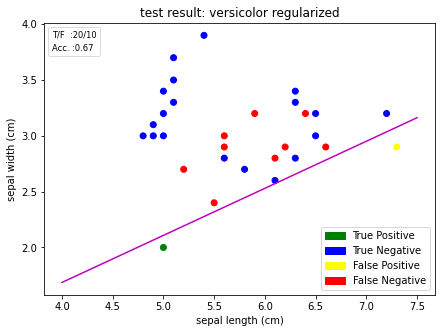

Class: virginica


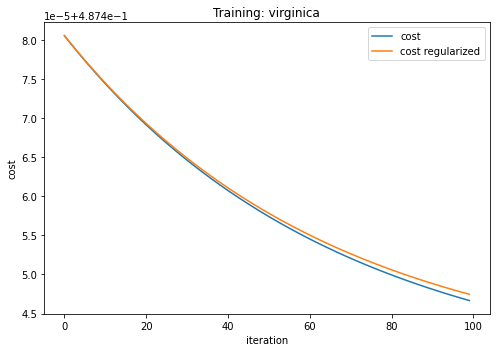

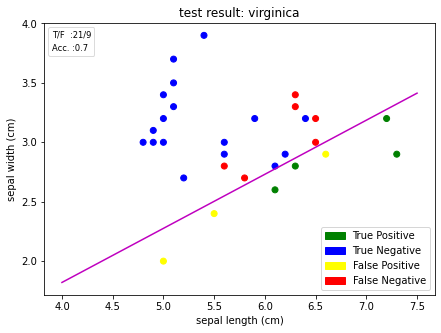

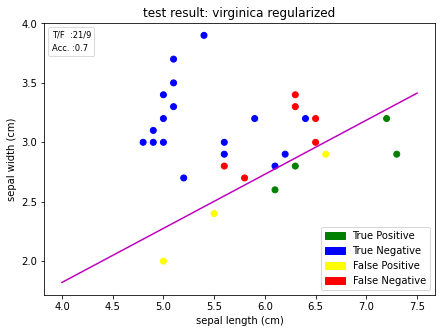

In [9]:
theta_data = []
theta_row = []
theta_col = ['theta#1','theta#2','theta#3']

# train & testing for all class
for i in range(max(iris.target)+1):
    print("Class: "+iris.target_names[i])

    # set target of selected class to 1 and other class to 0
    train_set = redefine_target(train_dataset, i)
    test_set = redefine_target(test_dataset, i)

    # train
    theta, cost = train(train_set, iteration=ITERATION, theta=STARTER_THETA[i])
    theta_reg, cost_reg = train(train_set, iteration=ITERATION, theta=STARTER_THETA[i], lamda=LAMBDA)

    # show cost graph
    plot_cost(cost, cost_reg=cost_reg, title=iris.target_names[i])
    
    # test
    X_test = test_set['data']
    y_val = test_set['target']
    y_hypo = hypothesis(X_test, theta)
    y_hypo_reg = hypothesis(X_test, theta_reg)

    # show test result
    test_result(X_test, y_hypo, y_val, title=iris.target_names[i])
    test_result(X_test, y_hypo_reg, y_val, title=iris.target_names[i]+" regularized")

    # add theta to array for comparation
    theta_data.append(theta.tolist())
    theta_data.append(theta_reg.tolist())
    theta_row.append(iris.target_names[i])
    theta_row.append(iris.target_names[i]+"(reg)")

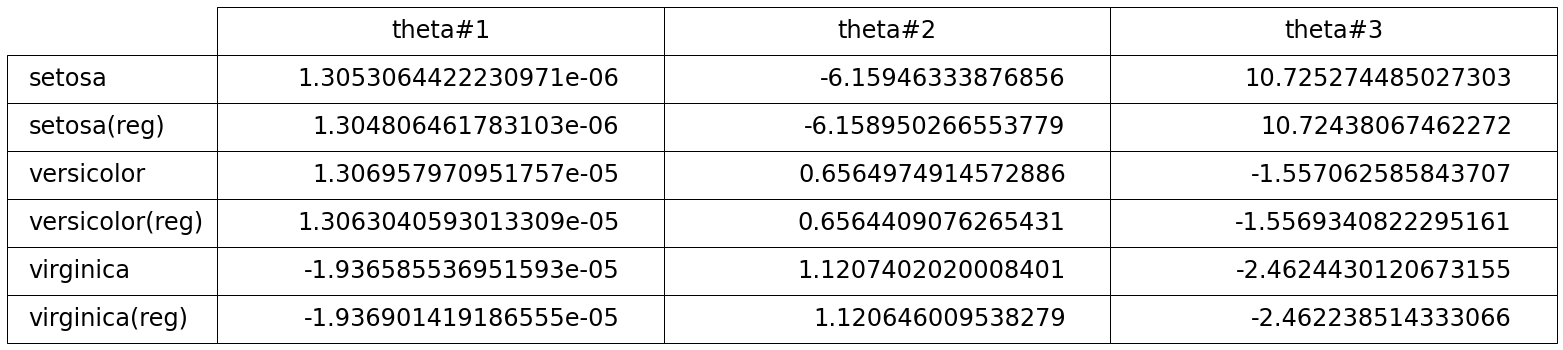

In [10]:
# show table for theta comparation

plt.figure()
the_table = plt.table(cellText=theta_data,rowLabels=theta_row, colLabels=theta_col, loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(24)
the_table.scale(4, 4)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()